In [2]:
#调包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# 读取数据
file_path = '/kaggle/input/home-data-for-ml-course/train.csv'
home_data = pd.read_csv(file_path, index_col=0)

In [5]:
#对数据进行初步观察
home_data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
home_data.shape

(1460, 80)

In [8]:
#第一部分，分析数据
home_data.select_dtypes(exclude=['object']).columns #排除字符串类型列，如果要排除数字改为np.number

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
#但某些本来是数字的列可能包含Nan等值，这些可能会被误认为别的列
#先对选出的列做个概括
home_data.select_dtypes(exclude=['object']).describe().round(decimals=2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [10]:
home_data.select_dtypes(include=['object']).columns#这一行是筛选，刚好作用相反

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
home_data.select_dtypes(include=['object']).describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


/tmp/ipykernel_32/4242024127.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)


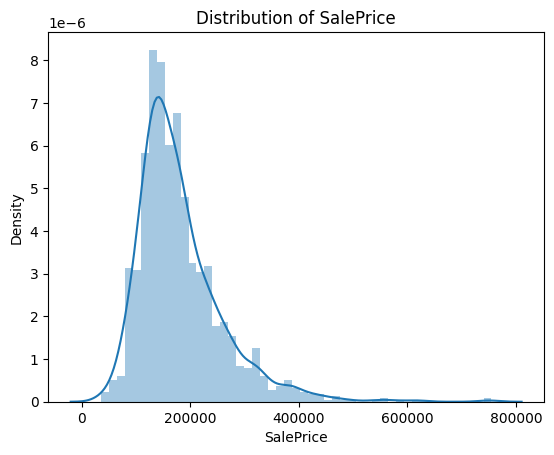

In [12]:
#对数据集的偏斜进行处理，让其更加接近正态分布，对于某些模型是有利的，比如线性回归
target = home_data.SalePrice
plt.figure()
sns.distplot(target)
plt.title('Distribution of SalePrice')
plt.show()
#显然能看出这是一个左偏斜数据集，想办法让结果平衡，label和feature可能都需要这样处理
#当然，这是数据集阶段进行处理，也可以在模型设计中进行归一化处理

/tmp/ipykernel_32/2029369590.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(target))


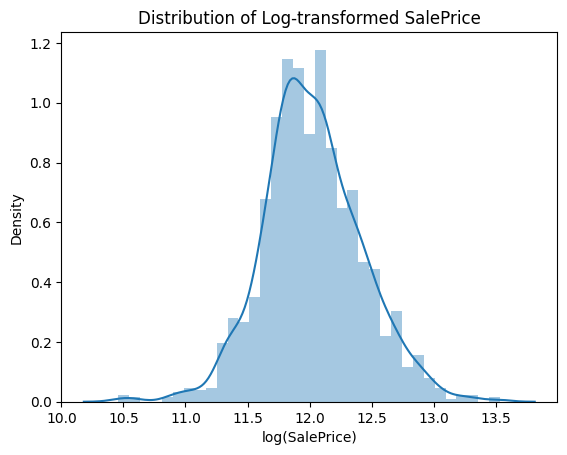

In [13]:
sns.distplot(np.log(target))
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

In [14]:
print('SalePrice has a skew of ' + str(target.skew().round(decimals=2)) + 
      ' while the log-transformed SalePrice improves the skew to ' + 
      str(np.log(target).skew().round(decimals=2)))

SalePrice has a skew of 1.88 while the log-transformed SalePrice improves the skew to 0.12


/tmp/ipykernel_32/168208941.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_attributes.iloc[:,i].dropna())
/tmp/ipykernel_32/168208941.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_attributes.iloc[:,i].dropna())
/tmp/ipykernel_32/168208941.py:6: UserWarning: 

`distplot` is a d

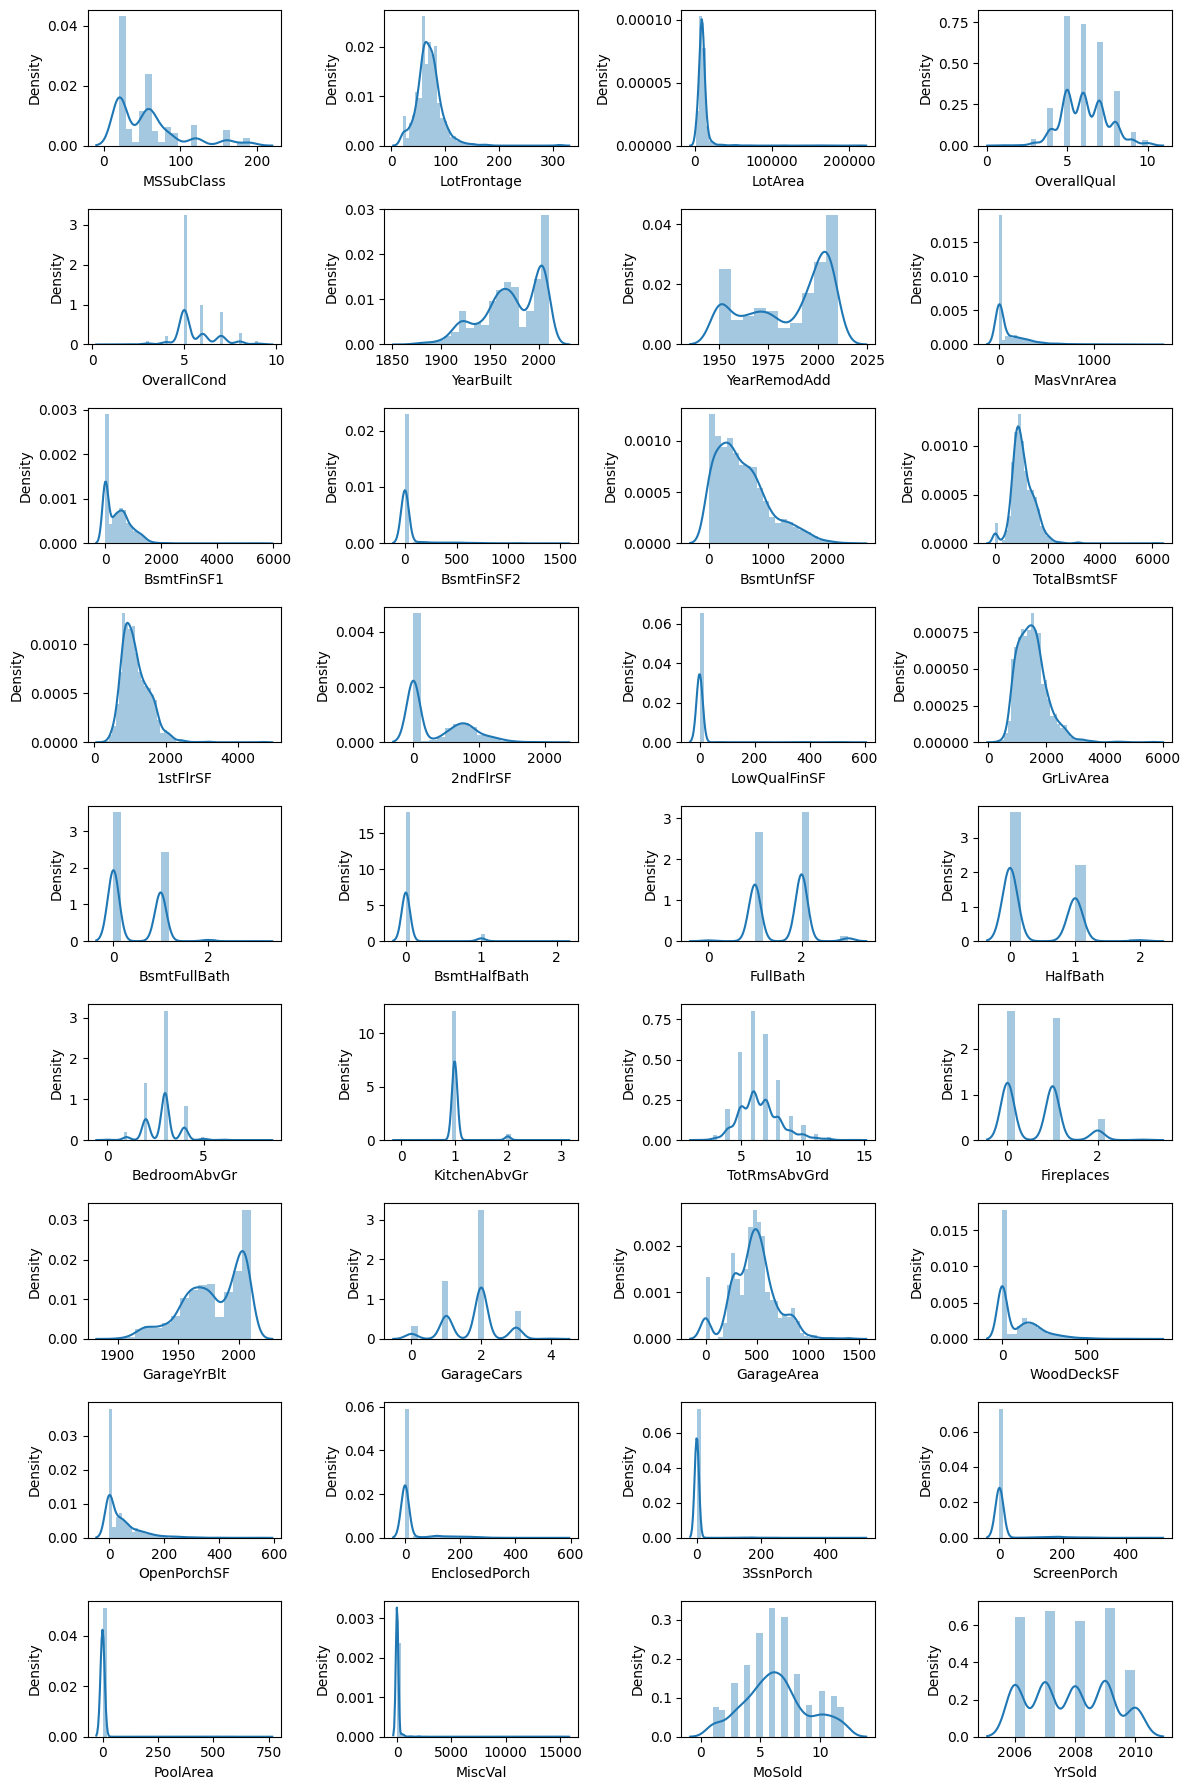

In [15]:
num_attributes = home_data.select_dtypes(exclude='object').drop('SalePrice', axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna())
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()#将除了标签以外的数字型变量分布绘制出来，进行观察

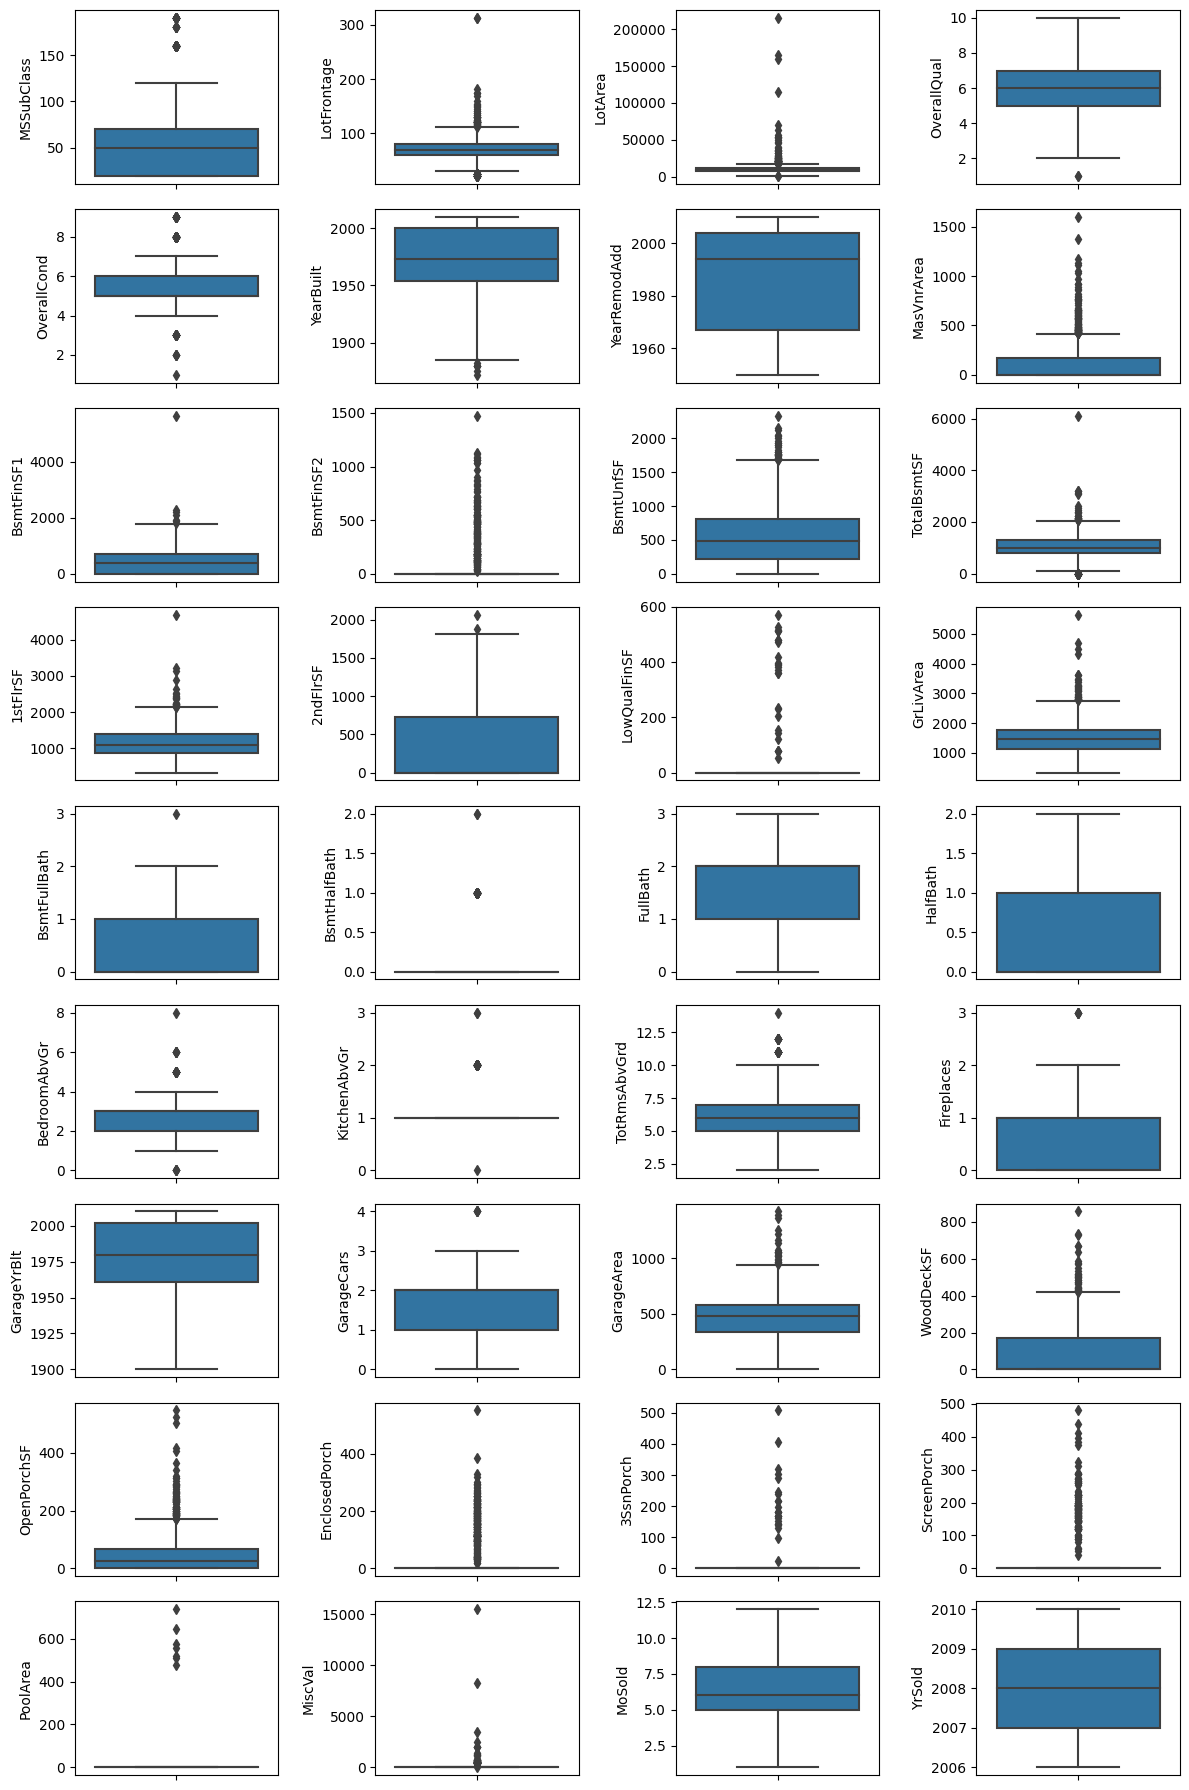

In [16]:
#查找异常数据，一般散点图和箱型图都适合进行这项操作
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

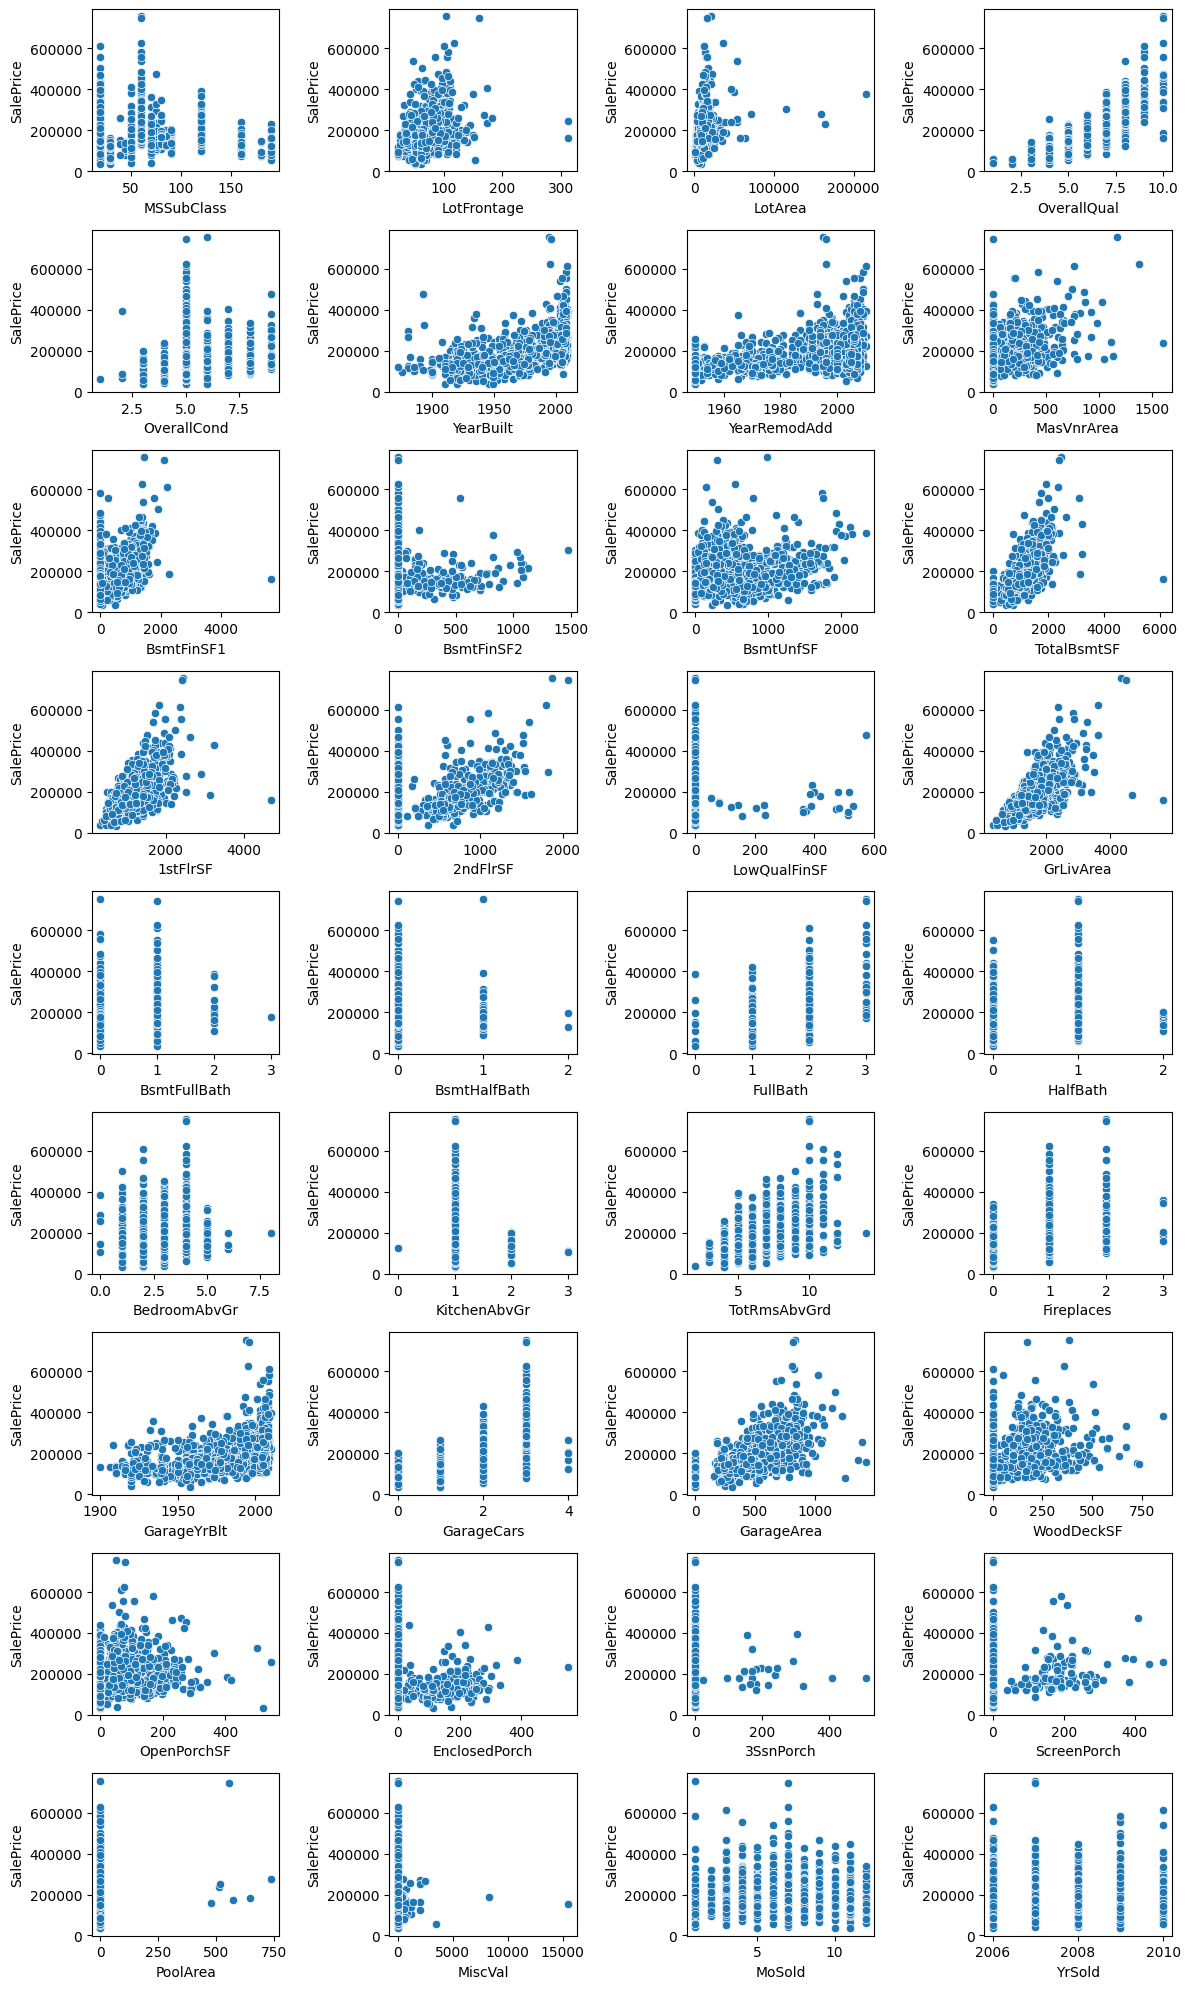

In [19]:
f = plt.figure(figsize=(12, 20))

for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(x=num_attributes.iloc[:, i], y=target)
    
plt.tight_layout()
plt.show()
#观测出以下几个可能出现问题的区域：
# A few outliers on the LotFrontage (say, >200) and LotArea (>100000) data.
# BsmtFinSF1 (>4000) and TotalBsmtSF (>6000)
# 1stFlrSF (>4000)
# GrLivArea (>4000 AND SalePrice <300000)
# LowQualFinSF (>550)

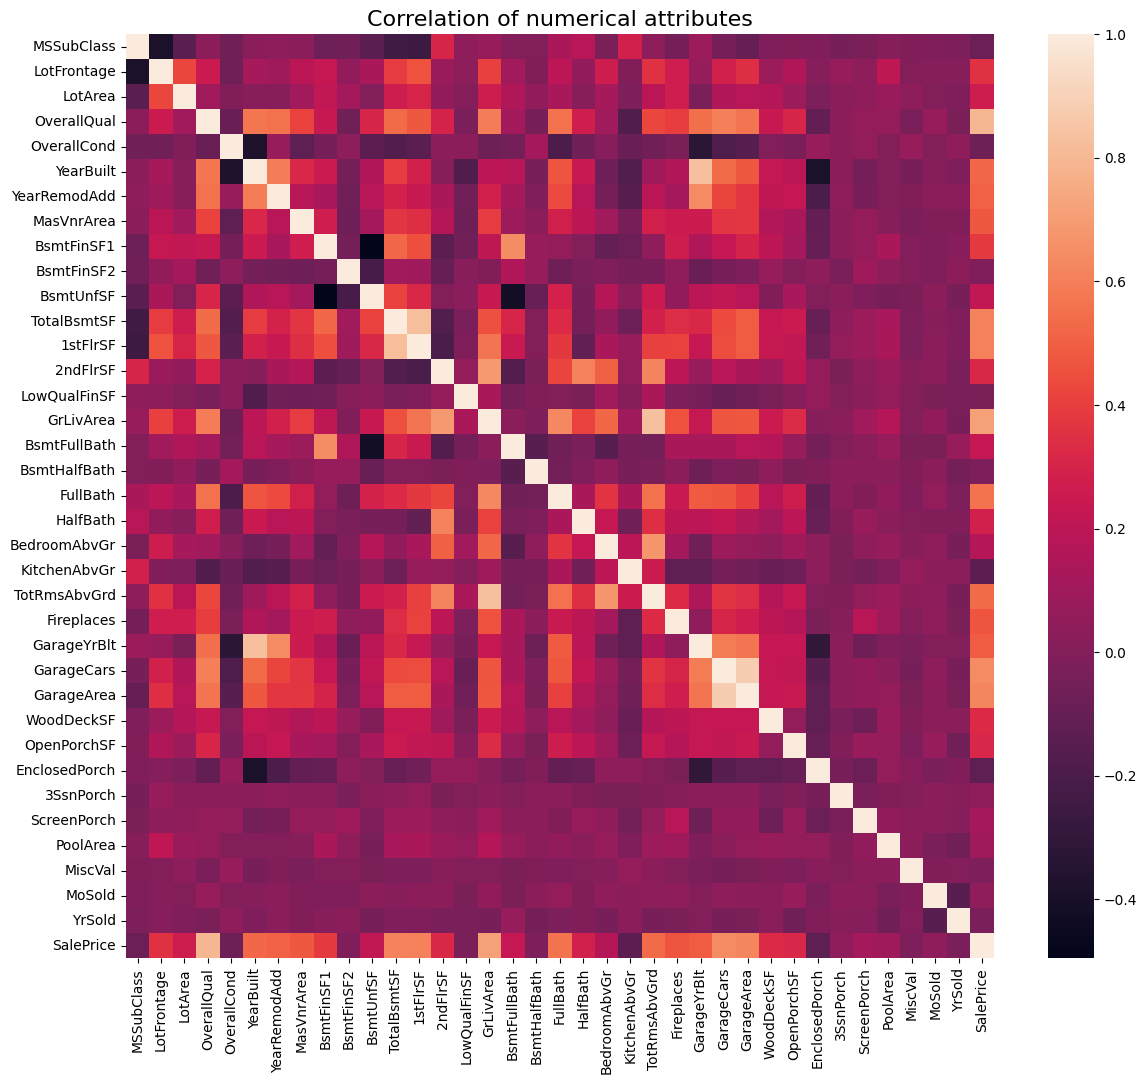

In [23]:
#评估属性之间的相关性，常用的比如皮尔逊相关系数，范围-1-1，结合热点图和数字化
#注意，没有存在线性相关不一定就没有相关性，且这种系数可能极大程度受到异常数据的影响
#Several authors have suggested that "to use linear regression for modelling, 
#it is necessary to remove correlated variables to improve your model", and 
#"it's a good practice to remove correlated variables during feature selection"
correlation = home_data.select_dtypes(exclude=['object']).corr()
f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

In [24]:
correlation['SalePrice'].sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

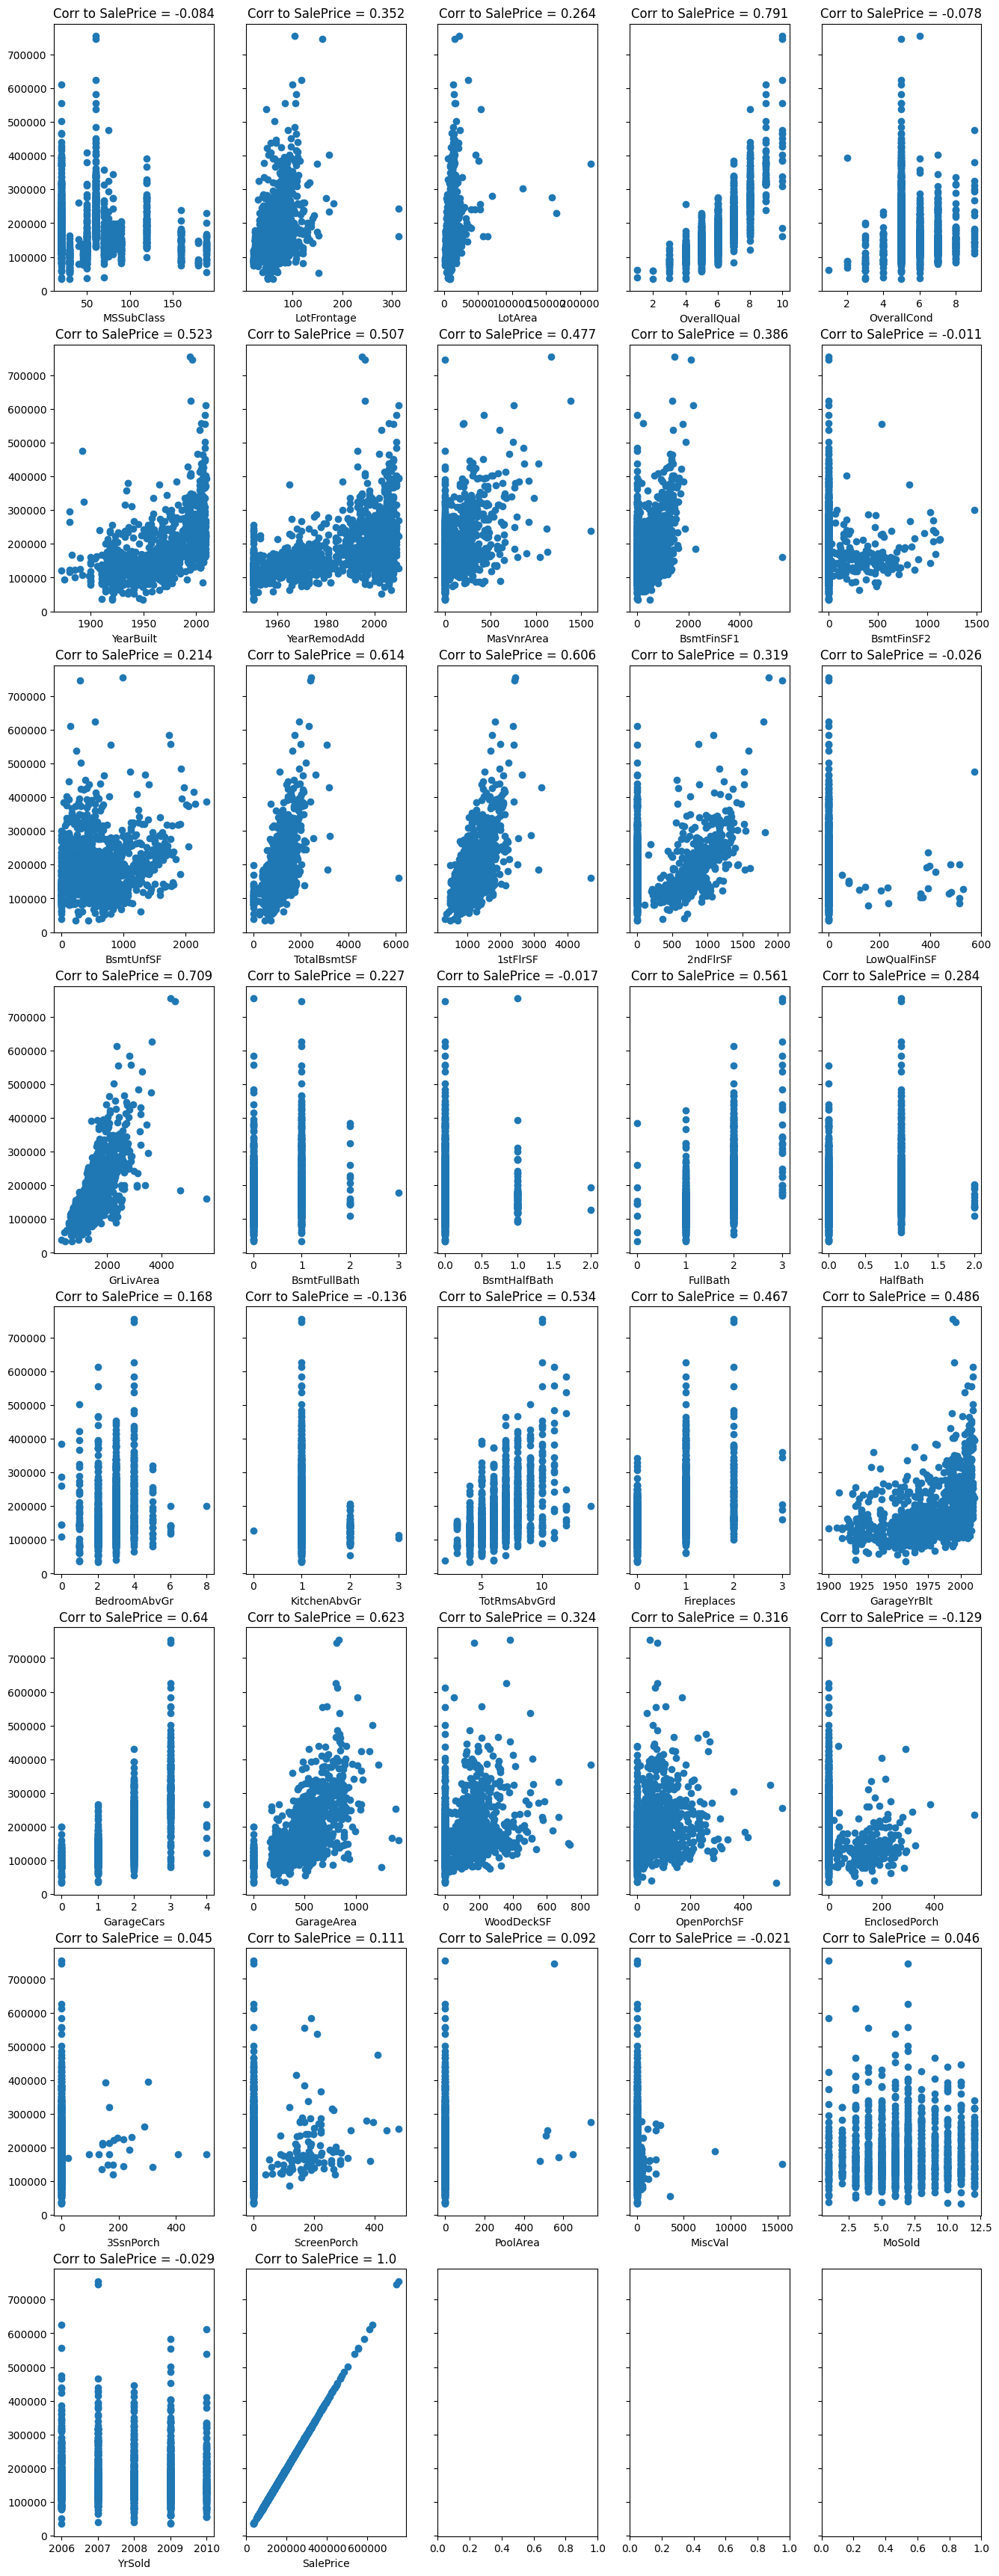

In [25]:
num_columns = home_data.select_dtypes(exclude='object').columns
corr_to_price = correlation['SalePrice']
n_cols = 5
n_rows = 8
fig, ax_arr = plt.subplots(n_rows, n_cols, figsize=(16,20), sharey=True)
plt.subplots_adjust(bottom=-0.8)
for j in range(n_rows):
    for i in range(n_cols):
        plt.sca(ax_arr[j, i])
        index = i + j*n_cols
        if index < len(num_columns):
            plt.scatter(home_data[num_columns[index]], home_data.SalePrice)
            plt.xlabel(num_columns[index])
            plt.title('Corr to SalePrice = '+ str(np.around(corr_to_price[index], decimals=3)))
plt.show()
#通过这种办法可以组合一些相关性很高的特征。
#组合一些相关性高的，排除一些相关性极低的
# Excluding GarageArea - highly (0.88) correlated with GarageCars, which has a higher corr with Price
# Excluding GarageYrBlt - highly (0.83) correlated with YearBuilt
# Excluding all attributes with low corr with Price and unclear non-linear correlation - e.g. MSSubClass, MoSold, YrSold, MiscVal, BsmtFinSF2, BsmtUnfSF, LowQualFinSF?

In [26]:
#排查缺失数据
#最多的暂不定填充策略
#次多的和其他特征相关性强，已经被删除，按住不表
#第三个可以暂时填充为0
num_attributes.isna().sum().sort_values(ascending=False).head()

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
WoodDeckSF        0
BedroomAbvGr      0
dtype: int64

In [27]:
#探索分类数据
cat_columns = home_data.select_dtypes(include='object').columns
print(cat_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


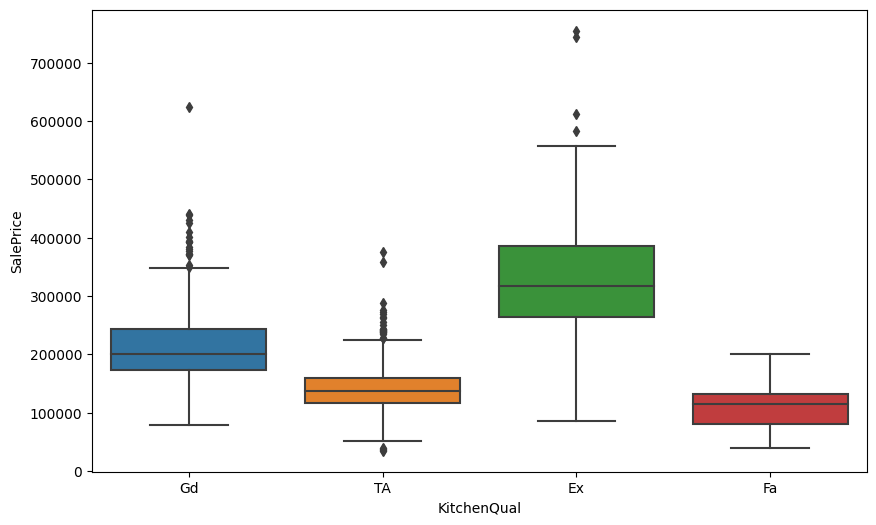

In [28]:
#箱型图同样可以用于分类标签，查看不同类下的数据分布
var = home_data['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=home_data.SalePrice, x=var)
plt.show()

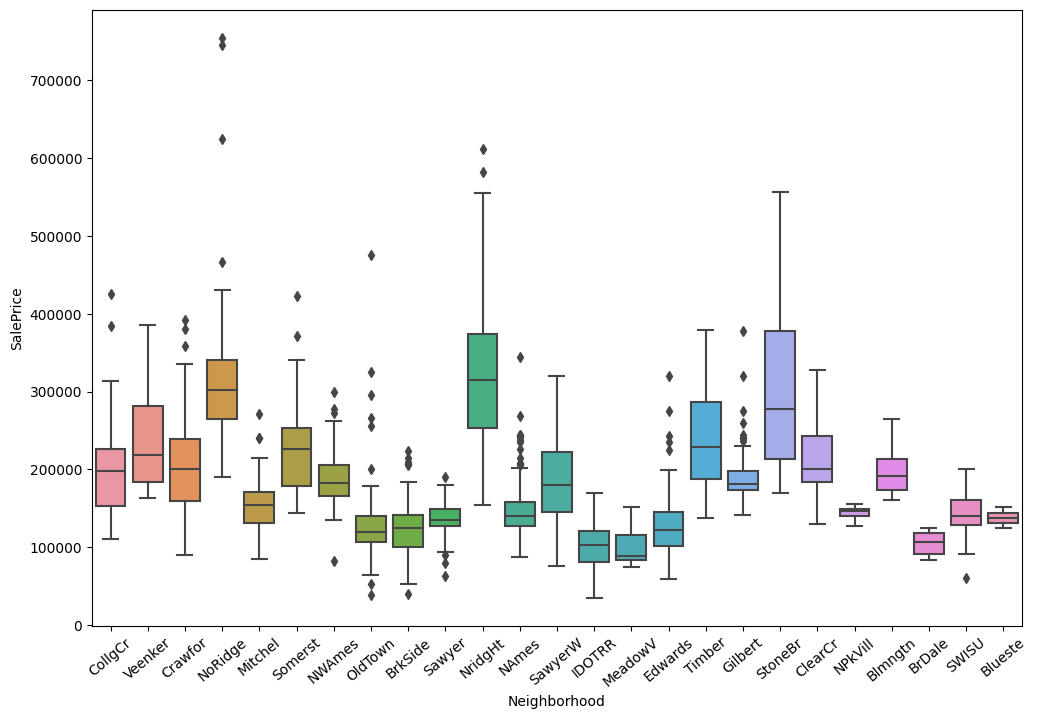

In [29]:
f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=home_data.SalePrice, x=home_data.Neighborhood)
plt.xticks(rotation=40)
plt.show()

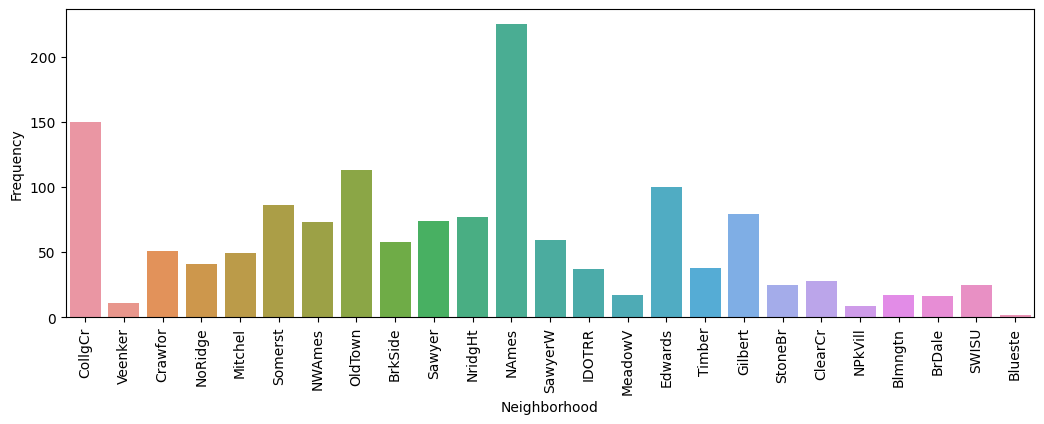

In [30]:
#也可以做频度分析
fig = plt.figure(figsize=(12.5,4))
sns.countplot(x='Neighborhood', data=home_data)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

In [31]:
#同样需要处理缺失值，结合具体意义处理，不要盲目删除/插值
# For the moment, assume that PoolQC to Bsmt attributes are missing as the houses do not have them (pools, basements, etc.). Hence, the missing values could be filled in with "None".
# MasVnrType has 8 missing values, the same number as missing MasVnrArea values. Likely not to have masonry veneer. Hence, fill with 'None'
home_data[cat_columns].isna().sum().sort_values(ascending=False).head(17)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
Electrical         1
KitchenQual        0
dtype: int64

In [32]:
#第二部分
#数据清洗和前处理
#先调包
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [33]:
# Create copy of dataset  ====================================
home_data_copy = home_data.copy()

# Dealing with missing/null values ===========================
# Numerical columns:
home_data_copy.MasVnrArea = home_data_copy.MasVnrArea.fillna(0)
# HOW TO TREAT LotFrontage - 259 missing values??

# Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']
for cat in cat_cols_fill_none:
    home_data_copy[cat] = home_data_copy[cat].fillna("None")

In [34]:
# Check for outstanding missing/null values
# Scikit-learn's Imputer will be used to address these
home_data_copy.isna().sum().sort_values(ascending=False).head()

LotFrontage     259
GarageYrBlt      81
Electrical        1
KitchenAbvGr      0
GarageFinish      0
dtype: int64

In [35]:
# Remove outliers based on observations on scatter plots against SalePrice:
home_data_copy = home_data_copy.drop(home_data_copy['LotFrontage']
                                     [home_data_copy['LotFrontage']>200].index)
home_data_copy = home_data_copy.drop(home_data_copy['LotArea']
                                     [home_data_copy['LotArea']>100000].index)
home_data_copy = home_data_copy.drop(home_data_copy['BsmtFinSF1']
                                     [home_data_copy['BsmtFinSF1']>4000].index)
home_data_copy = home_data_copy.drop(home_data_copy['TotalBsmtSF']
                                     [home_data_copy['TotalBsmtSF']>6000].index)
home_data_copy = home_data_copy.drop(home_data_copy['1stFlrSF']
                                     [home_data_copy['1stFlrSF']>4000].index)
home_data_copy = home_data_copy.drop(home_data_copy.GrLivArea
                                     [(home_data_copy['GrLivArea']>4000) & 
                                      (target<300000)].index)
home_data_copy = home_data_copy.drop(home_data_copy.LowQualFinSF
                                     [home_data_copy['LowQualFinSF']>550].index)

In [37]:
#处理偏移
home_data_copy['SalePrice'] = np.log(home_data_copy['SalePrice'])
home_data_copy = home_data_copy.rename(columns={'SalePrice': 'SalePrice_log'})

<Axes: >

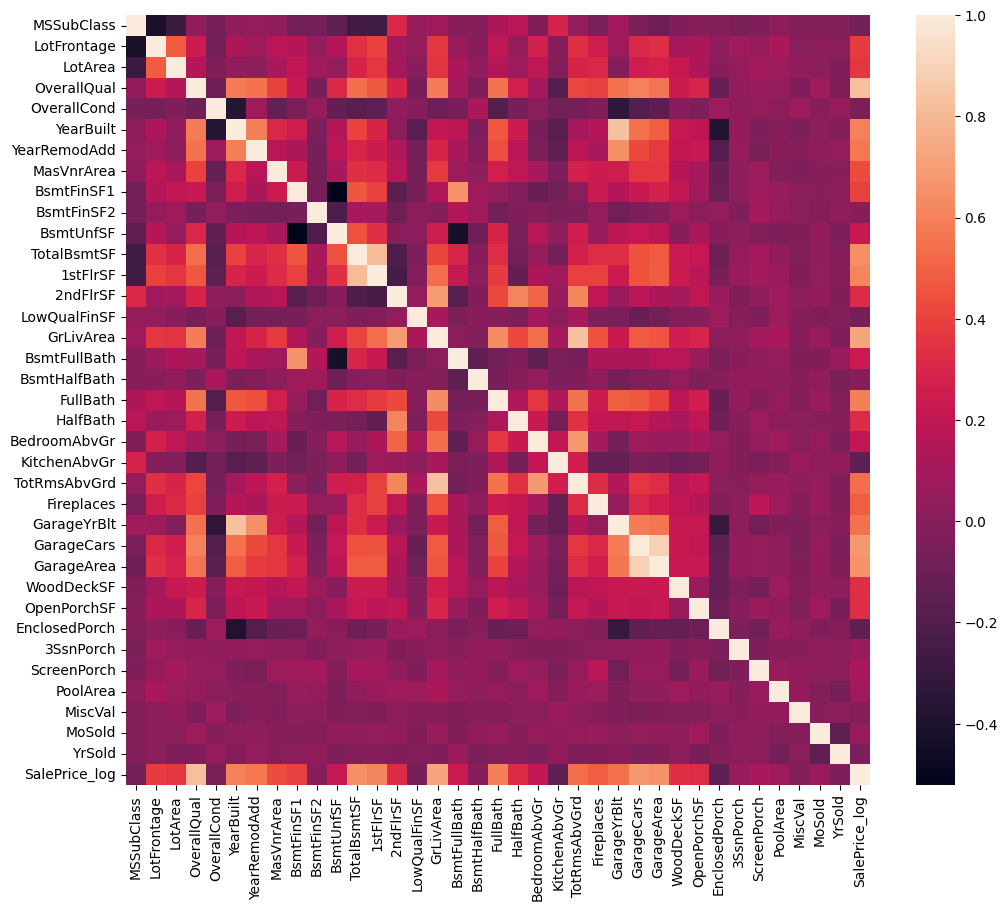

In [39]:
#第三部分
#特征工程
#记录几个相关性极强的特征
# GarageCars and GarageArea (0.882)
# YearBuilt and GarageYrBlt (0.826)
# GrLivArea_log1p and TotRmsAbvGrd (0.826)
# TotalBsmtSF and 1stFlrSF_log1p (0.780)
#如何进行降维？Perhaps choose to drop the column with the lower correlation 
#against SalePrice_log from the above pairs with more than 0.8 correlation.
transformed_corr = home_data_copy.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(12,10))
sns.heatmap(transformed_corr)

In [40]:
# Remove attributes that were identified for excluding when viewing scatter plots & corr values
attributes_drop = ['SalePrice_log', 'MiscVal', 'MSSubClass', 'MoSold', 'YrSold', 
                   'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'] # high corr with other attributes

X = home_data_copy.drop(attributes_drop, axis=1)

# Create target object and call it y
y = home_data_copy.SalePrice_log

# One-hot-encoding to transform all categorical data
X = pd.get_dummies(X)

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Normalisation - to be added later
# normaliser = StandardScaler()
# train_X = normaliser.fit_transform(train_X)
# val_X = normaliser.transform(val_X)

# Final imputation of missing data - to address those outstanding after previous section
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)

In [41]:
#模型引入和评估
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [42]:
def inv_y(transformed_y):
    return np.exp(transformed_y)

# Series to collate mean absolute errors for each algorithm
mae_compare = pd.Series()
mae_compare.index.name = 'Algorithm'

# Specify Model ================================
# iowa_model = DecisionTreeRegressor(random_state=1)
# # Fit Model
# iowa_model.fit(train_X, train_y)

# # Make validation predictions and calculate mean absolute error
# val_predictions = iowa_model.predict(val_X)
# val_mae = mean_absolute_error(inv_y(val_predictions), inv_y(val_y))
# mae_compare['DecisionTree'] = val_mae
# # print("Validation MAE for Decision Tree when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Decision Tree. Using best value for max_leaf_nodes ==============
# iowa_model = DecisionTreeRegressor(max_leaf_nodes=90, random_state=1)
# iowa_model.fit(train_X, train_y)
# val_predictions = iowa_model.predict(val_X)
# val_mae = mean_absolute_error(inv_y(val_predictions), inv_y(val_y))
# mae_compare['DecisionTree_opt_max_leaf_nodes'] = val_mae
# # print("Validation MAE for Decision Tree with best value of max_leaf_nodes: {:,.0f}".format(val_mae))

# Random Forest. Define the model. =============================
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(inv_y(rf_val_predictions), inv_y(val_y))

mae_compare['RandomForest'] = rf_val_mae
# print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))


# XGBoost. Define the model. ======================================
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(train_X, train_y, early_stopping_rounds=5, 
              eval_set=[(val_X,val_y)], verbose=False)
xgb_val_predictions = xgb_model.predict(val_X)
xgb_val_mae = mean_absolute_error(inv_y(xgb_val_predictions), inv_y(val_y))

mae_compare['XGBoost'] = xgb_val_mae
# print("Validation MAE for XGBoost Model: {:,.0f}".format(xgb_val_mae))

# Linear Regression =================================================
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
linear_val_predictions = linear_model.predict(val_X)
linear_val_mae = mean_absolute_error(inv_y(linear_val_predictions), inv_y(val_y))

mae_compare['LinearRegression'] = linear_val_mae
# print("Validation MAE for Linear Regression Model: {:,.0f}".format(linear_val_mae))

# Lasso ==============================================================
lasso_model = Lasso(alpha=0.0005, random_state=5)
lasso_model.fit(train_X, train_y)
lasso_val_predictions = lasso_model.predict(val_X)
lasso_val_mae = mean_absolute_error(inv_y(lasso_val_predictions), inv_y(val_y))

mae_compare['Lasso'] = lasso_val_mae
# print("Validation MAE for Lasso Model: {:,.0f}".format(lasso_val_mae))

# Ridge ===============================================================
ridge_model = Ridge(alpha=0.002, random_state=5)
ridge_model.fit(train_X, train_y)
ridge_val_predictions = ridge_model.predict(val_X)
ridge_val_mae = mean_absolute_error(inv_y(ridge_val_predictions), inv_y(val_y))

mae_compare['Ridge'] = ridge_val_mae
# print("Validation MAE for Ridge Regression Model: {:,.0f}".format(ridge_val_mae))

# ElasticNet ===========================================================
elastic_net_model = ElasticNet(alpha=0.02, random_state=5, l1_ratio=0.7)
elastic_net_model.fit(train_X, train_y)
elastic_net_val_predictions = elastic_net_model.predict(val_X)
elastic_net_val_mae = mean_absolute_error(inv_y(elastic_net_val_predictions), inv_y(val_y))

mae_compare['ElasticNet'] = elastic_net_val_mae
# print("Validation MAE for Elastic Net Model: {:,.0f}".format(elastic_net_val_mae))

# KNN Regression ========================================================
# knn_model = KNeighborsRegressor()
# knn_model.fit(train_X, train_y)
# knn_val_predictions = knn_model.predict(val_X)
# knn_val_mae = mean_absolute_error(inv_y(knn_val_predictions), inv_y(val_y))

# mae_compare['KNN'] = knn_val_mae
# # print("Validation MAE for KNN Model: {:,.0f}".format(knn_val_mae))

# Gradient Boosting Regression ==========================================
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
gbr_model.fit(train_X, train_y)
gbr_val_predictions = gbr_model.predict(val_X)
gbr_val_mae = mean_absolute_error(inv_y(gbr_val_predictions), inv_y(val_y))

mae_compare['GradientBoosting'] = gbr_val_mae
# print("Validation MAE for Gradient Boosting Model: {:,.0f}".format(gbr_val_mae))

# # Ada Boost Regression ================================================
# ada_model = AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=5)
# ada_model.fit(train_X, train_y)
# ada_val_predictions = ada_model.predict(val_X)
# ada_val_mae = mean_absolute_error(inv_y(ada_val_predictions), inv_y(val_y))

# mae_compare['AdaBoost'] = ada_val_mae
# # print("Validation MAE for Ada Boost Model: {:,.0f}".format(ada_val_mae))

# # Support Vector Regression ===========================================
# svr_model = SVR(kernel='linear')
# svr_model.fit(train_X, train_y)
# svr_val_predictions = svr_model.predict(val_X)
# svr_val_mae = mean_absolute_error(inv_y(svr_val_predictions), inv_y(val_y))

# mae_compare['SVR'] = svr_val_mae
# print("Validation MAE for SVR Model: {:,.0f}".format(svr_val_mae))

print('MAE values for different algorithms:')
mae_compare.sort_values(ascending=True).round()

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


MAE values for different algorithms:


Algorithm
Lasso               13687.0
Ridge               14272.0
LinearRegression    14419.0
XGBoost             14601.0
GradientBoosting    14714.0
RandomForest        16462.0
ElasticNet          16743.0
dtype: float64

In [43]:
#交叉验证
from sklearn.model_selection import cross_val_score

imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)
n_folds = 10

# =========================================================================
scores = cross_val_score(lasso_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
lasso_mae_scores = np.sqrt(-scores)

print('For LASSO model:')
# print(lasso_mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(lasso_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(lasso_mae_scores.std().round(decimals=3)))

For LASSO model:
Mean RMSE = 0.109
Error std deviation = 0.016


In [44]:
scores = cross_val_score(gbr_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
gbr_mae_scores = np.sqrt(-scores)

print('For Gradient Boosting model:')
# print(lasso_mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(gbr_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(gbr_mae_scores.std().round(decimals=3)))

For Gradient Boosting model:
Mean RMSE = 0.119
Error std deviation = 0.018


In [46]:
scores = cross_val_score(xgb_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
mae_scores = np.sqrt(-scores)

print('For XGBoost model:')
# print(mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(mae_scores.std().round(decimals=3)))

For XGBoost model:
Mean RMSE = 0.119
Error std deviation = 0.018


In [48]:
scores = cross_val_score(rf_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
mae_scores = np.sqrt(-scores)

print('For Random Forest model:')
# print(mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(mae_scores.std().round(decimals=3)))

For Random Forest model:
Mean RMSE = 0.134
Error std deviation = 0.016


In [49]:
#第五部分，注意要对test的label做相同的归一化处理
#选择最佳模型&调参
# Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# # Tuning XGBoost
# param_grid = [{'n_estimators': [1000, 1500], 
#                'learning_rate': [0.01, 0.03] }]
# #               'max_depth': [3, 6, 9]}]

# top_reg = XGBRegressor()

# Tuning Lasso
param_grid = [{'alpha': [0.0007, 0.0005, 0.005]}]
top_reg = Lasso()

# -------------------------------------------------------
grid_search = GridSearchCV(top_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')

grid_search.fit(imputed_X, y)

grid_search.best_params_

{'alpha': 0.0005}

In [51]:
# path to file you will use for predictions
test_data_path = '/kaggle/input/home-data-for-ml-course/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

In [52]:
# create test_X which to perform all previous pre-processing on
test_X = test_data.copy()

# Repeat treatments for missing/null values =====================================
# Numerical columns:
test_X.MasVnrArea = test_X.MasVnrArea.fillna(0)

# Categorical columns:
for cat in cat_cols_fill_none:
    test_X[cat] = test_X[cat].fillna("None")

# Repeat dropping of chosen attributes ==========================================
if 'SalePrice_log' in attributes_drop:
    attributes_drop.remove('SalePrice_log')

test_X = test_data.drop(attributes_drop, axis=1)

# One-hot encoding for categorical data =========================================
test_X = pd.get_dummies(test_X)


# ===============================================================================
# Ensure test data is encoded in the same manner as training data with align command
final_train, final_test = X.align(test_X, join='left', axis=1)

# Imputer for all other missing values in test data. Note: Do not 'fit_transform'
final_test_imputed = my_imputer.transform(final_test)

In [53]:
# Create model - on full set of data (training & validation)
# Best model = Lasso?
final_model = Lasso(alpha=0.0005, random_state=5)
# final_model = XGBRegressor(n_estimators=1500, learning_rate=0.03)
final_train_imputed = my_imputer.fit_transform(final_train)

# Fit the model using all the data - train it on all of X and y
final_model.fit(final_train_imputed, y)

Lasso(alpha=0.0005, random_state=5)

In [54]:
# make predictions which we will submit. 
test_preds = final_model.predict(final_test_imputed)

# The lines below shows you how to save your data in the format needed to score it in the competition
# Reminder: predictions are in log(SalePrice). Need to inverse-transform.
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': inv_y(test_preds)})

output.to_csv('submission.csv', index=False)